In [ ]:
# Kernel PCA

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

In [4]:
df.sample(4)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
457,458,28.0,51.8625,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
577,578,39.0,55.9000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
1174,1175,9.0,15.2458,1,1,0,0,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0
404,405,20.0,8.6625,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [6]:
df.shape

(1309, 28)

In [8]:
df.rename(columns = {'2urvived':'Survived'}, inplace = True)

In [9]:
df.sample(4)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
636,637,32.0,7.925,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
506,507,33.0,26.000,1,0,0,0,0,0,0,...,0,0,0,2,0,0,2.0,0,0,1
428,429,28.0,7.750,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
1278,1279,57.0,13.000,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2.0,0,0,0


In [54]:
df.shape

(1309, 27)

In [10]:
df.dtypes

Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.15          int64
zero.16          int64
Embarked       float64
zero.17          int64
zero.18          int64
Survived         int64
dtype: object

In [11]:
df['Survived'].value_counts()

0    967
1    342
Name: Survived, dtype: int64

In [17]:
df['Passengerid'].nunique()

1309

In [61]:
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
zero        0
zero.1      0
zero.2      0
zero.3      0
zero.4      0
zero.5      0
zero.6      0
Parch       0
zero.7      0
zero.8      0
zero.9      0
zero.10     0
zero.11     0
zero.12     0
zero.13     0
zero.14     0
Pclass      0
zero.15     0
zero.16     0
Embarked    0
zero.17     0
zero.18     0
Survived    0
dtype: int64

In [60]:
df['Embarked'].unique()

array([2., 0., 1.])

In [59]:
df.dropna(axis=0, inplace = True)
# df.replace(to_replace = 'NaN', value =2)

In [18]:
df.drop('Passengerid',axis = 1, inplace = True)

In [63]:
df.shape

(1307, 27)

In [20]:
df.head()

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [64]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [65]:
X.shape,Y.shape

((1307, 26), (1307,))

In [66]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [28]:
from sklearn.decomposition import KernelPCA

In [35]:
kpca = KernelPCA(n_components = None, kernel = 'rbf')

In [67]:
kpca.fit(X)

KernelPCA(kernel='rbf')

In [72]:
kpca.eigenvalues_[:15]

array([2.40501951e+01, 1.77009937e+01, 1.33335024e+01, 2.29335724e+00,
       1.60631451e+00, 7.10232153e-01, 5.74301779e-01, 3.23207739e-01,
       2.50443061e-01, 2.14495961e-01, 5.74584370e-02, 4.32923912e-02,
       3.11330364e-02, 2.99040195e-02, 2.33851861e-02])

In [74]:
kpca.eigenvectors_

array([[-0.03009992, -0.01067666,  0.00207505, ..., -0.00268784,
         0.00461717,  0.01998274],
       [ 0.05915913,  0.02805845,  0.01327257, ..., -0.03055729,
        -0.02274081,  0.00439071],
       [ 0.01563311, -0.04625219,  0.0011074 , ...,  0.00117435,
         0.00104657, -0.01076698],
       ...,
       [-0.02975105, -0.00855313,  0.00050337, ...,  0.00543611,
         0.00501722,  0.00029254],
       [-0.03004869, -0.0096614 ,  0.00151866, ...,  0.00157109,
        -0.00029504,  0.00658202],
       [-0.00961491,  0.02195425,  0.05955918, ..., -0.03331989,
         0.01310605, -0.01115216]])

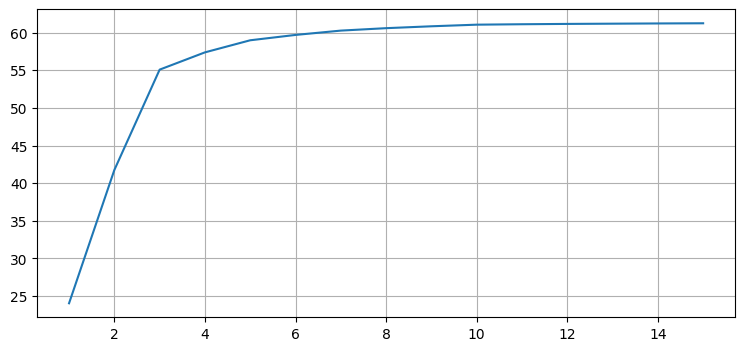

In [165]:
#scree plot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (9,4))
plt.grid()
#plt.xlim(1, 28)
plt.plot(range(1,16,1),np.cumsum(kpca.eigenvalues_))

In [116]:
kpca = KernelPCA(n_components= 15, kernel="rbf")
kpca.fit(X)

KernelPCA(kernel='rbf', n_components=15)

In [78]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test = train_test_split(kpca.transform(X),Y,test_size = 0.2,random_state = 42)

In [152]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1045, 4), (262, 4), (1045,), (262,))

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
model = LogisticRegression()

In [155]:
model.fit(x_train,y_train)

LogisticRegression()

In [156]:
y_pred = model.predict(x_test)

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
confusion_matrix(y_pred,y_test)

array([[183,  53],
       [  9,  17]])

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7633587786259542

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(n_components = None)

In [126]:
pca.fit_transform(df)

array([[-2.62876639e+01, -6.26332631e+00,  3.25216988e-01, ...,
        -2.13665496e-15, -4.23196952e-15, -9.58320748e-15],
       [ 3.84477597e+01,  6.75193970e+00, -1.56040995e-01, ...,
         2.56772435e-15,  1.47917986e-15, -2.70030584e-16],
       [-2.54266967e+01, -2.28921233e+00, -3.98061119e-01, ...,
        -7.78960936e-15, -9.39644889e-15, -6.96446671e-15],
       ...,
       [-2.55203168e+01,  1.02302270e+01, -1.15951417e-01, ...,
         2.79608072e-17,  2.26794194e-16,  2.65002454e-16],
       [-2.52115828e+01, -2.91293573e-01, -3.69660039e-01, ...,
         1.14927184e-17,  2.29161238e-16,  1.07319304e-16],
       [-1.09053775e+01, -9.87559420e-01,  5.33396723e-01, ...,
        -6.10875946e-19, -3.26938421e-16, -1.42030375e-17]])

In [127]:
pca.explained_variance_

array([2.68377281e+03, 1.60566830e+02, 1.19928098e+00, 6.12517667e-01,
       5.41808101e-01, 4.32628019e-01, 2.49412022e-01, 1.17415662e-01,
       2.58635817e-29, 2.58635817e-29, 2.58635817e-29, 2.58635817e-29,
       2.58635817e-29, 2.58635817e-29, 2.58635817e-29, 2.58635817e-29,
       2.58635817e-29, 2.58635817e-29, 2.58635817e-29, 2.58635817e-29,
       2.58635817e-29, 2.58635817e-29, 2.58635817e-29, 2.58635817e-29,
       2.58635817e-29, 2.58635817e-29, 2.58635817e-29])

In [129]:
pca.explained_variance_ratio_

array([9.42503841e-01, 5.63888470e-02, 4.21170870e-04, 2.15107721e-04,
       1.90275501e-04, 1.51932968e-04, 8.75900478e-05, 4.12347542e-05,
       9.08293168e-33, 9.08293168e-33, 9.08293168e-33, 9.08293168e-33,
       9.08293168e-33, 9.08293168e-33, 9.08293168e-33, 9.08293168e-33,
       9.08293168e-33, 9.08293168e-33, 9.08293168e-33, 9.08293168e-33,
       9.08293168e-33, 9.08293168e-33, 9.08293168e-33, 9.08293168e-33,
       9.08293168e-33, 9.08293168e-33, 9.08293168e-33])

In [131]:
df.shape

(1307, 27)

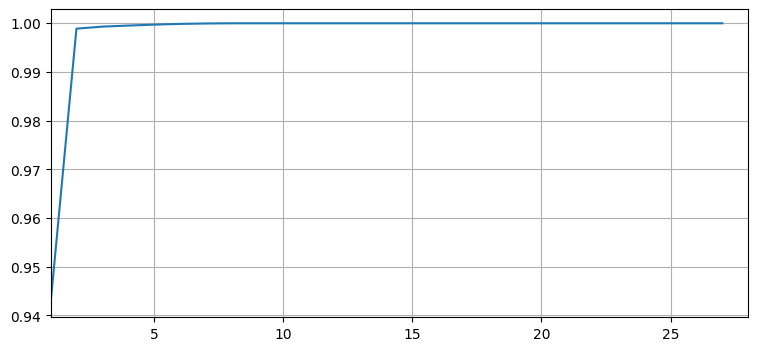

In [144]:
#scree plot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (9,4))
plt.grid()
plt.xlim(1, 28)
plt.plot(range(1,28,1),np.cumsum(pca.explained_variance_ratio_))

In [149]:
pca = PCA(n_components = 4)
pca.fit(X)

PCA(n_components=4)

In [150]:
pca.explained_variance_ratio_.cumsum()

array([0.39876275, 0.69412023, 0.91559228, 0.95354218])

In [151]:
x_train,x_test,y_train,y_test = train_test_split(pca.transform(X),Y,test_size = 0.2,random_state = 42)